In [5]:
!pip3 install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
!ls

0_CreateMarketingData.ipynb  0_CreateWebrootData.ipynb	data  README.md


In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
camp_conversion_df = pd.read_csv('data/campaign_conversion.csv')

In [9]:
camp_conversion_df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [10]:
mu, sigma = 1, .4 # mean and standard deviation
s = np.random.normal(mu, sigma, 64000)

In [11]:
camp_conversion_df['score'] = camp_conversion_df['conversion']+s

In [12]:
camp_conversion_df['score'].sum()

73345.5549229813

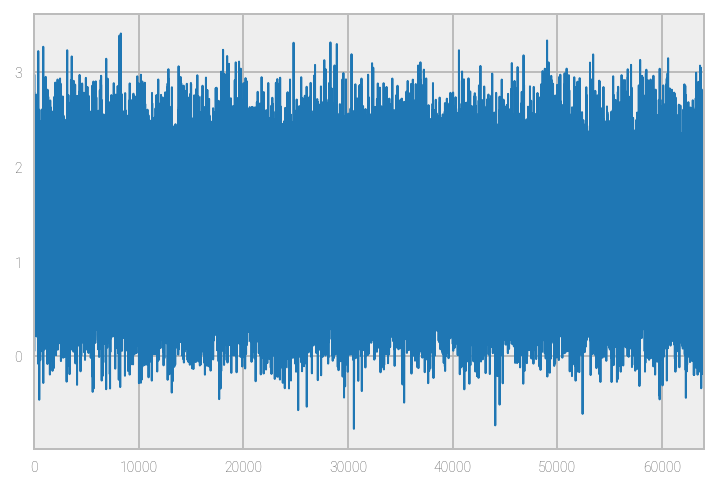

In [13]:
camp_conversion_df['score'].plot()

In [14]:
r = np.corrcoef(camp_conversion_df['score'], camp_conversion_df['conversion'])
#checking corr with new feature
r

array([[1.       , 0.6619534],
       [0.6619534, 1.       ]])

In [15]:
!pip3 install faker

You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
from faker import Faker

In [17]:
fake = Faker('en_US')

In [18]:
final = {} 
rg = 64000
final['name'] = [fake.name() for i in range(rg)]
final['street_address'] = [fake.street_address() for i in range(rg)]
final['city'] = [fake.city() for i in range(rg)]
final['postcode'] = [fake.postcode() for i in range(rg)]
final['phone_number'] = [fake.phone_number() for i in range(rg)]
final['job'] = [fake.job() for i in range(rg)]

In [19]:
personal_data = pd.DataFrame(final)

In [20]:
df = pd.concat([personal_data, camp_conversion_df], axis=1)

In [21]:
df.to_csv('data/df.csv', index=False)

Creating time series data

In [ ]:
!pip3 install TimeSynth

     |████████████████████████████████| 11.2MB 12.3MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 59.8MB/s eta 0:00:01
     |████████████████████████████████| 143kB 74.9MB/s eta 0:00:01
     |████████████████████████████████| 522kB 62.9MB/s eta 0:00:01
  Created wheel for jitcxde-common: filename=jitcxde_common-1.4.1-cp36-none-any.whl size=14933 sha256=f60d28eb72065b493a983b58eb49f819bdff8720cb210a9e5108548c800b705b
  Stored in directory: /home/cdsw/.cache/pip/wheels/10/cd/50/f17ec174e477f7be77d38256b1ef5ca4e1da53dcdb85732817
  Created wheel for jitcdde: filename=jitcdde-1.4.0-cp36-none-any.whl size=30647 sha256=3488bc0c50288f22acc4e4ba639c291f73548d6e051e6b24637811f98e377097
  Stored in directory: /home/cdsw/.cache/pip/wheels/2c/14/0b/e7afe0b0f1dfd5327ad49307b98670c38a7df3bc4872d69178
  Created wheel for mpmath: filename=mpmath-1.1.0-cp36-none-any.whl size=532240 sha256=701d2a6ae1339c22387262e66310b400b165e2729a0149262b61967210c6a2c0
  Stored in directory: /home/cdsw/.

In [ ]:
import timesynth as ts

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=100)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [ ]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.3)

In [ ]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=.3)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [ ]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples+50, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

In [ ]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [ ]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

In [ ]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

In [ ]:

# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [ ]:

# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [ ]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [ ]:

# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Pseudoperiodic signal');

In [ ]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]

In [ ]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

In [ ]:
car = ts.signals.CAR(ar_param=.99, sigma=5)
car_series = ts.TimeSeries(signal_generator=car)
samples = car_series.sample(irregular_time_samples)

In [ ]:
plt.plot(irregular_time_samples, (samples[0]+35)*15, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

In [ ]:
import random

In [ ]:
def create_cont_autoreg_process(n):
    
    dat = []
    
    sigma = 20
    ar_param = .2
    car = ts.signals.CAR(ar_param=ar_param, sigma=sigma)
    car_series = ts.TimeSeries(signal_generator=car)
    samples = car_series.sample(irregular_time_samples)
    
    dat.append((samples[0] + ar_param +5) * sigma)
    
    sigma = 4
    ar_param = .2
    car = ts.signals.CAR(ar_param=ar_param, sigma=sigma)
    car_series = ts.TimeSeries(signal_generator=car)
    samples = car_series.sample(irregular_time_samples)    
    
    dat.append((samples[0] + ar_param +5) * sigma)
    
    for i in range(n):
        sigma = random.randint(1,35)
        ar_param = random.randint(1,10)
        car = ts.signals.CAR(ar_param=ar_param/10, sigma=sigma)
        car_series = ts.TimeSeries(signal_generator=car)
        samples = car_series.sample(irregular_time_samples)
        
        dat.append((samples[0] + ar_param +5) * sigma)
        
    return dat

In [ ]:
ex = create_cont_autoreg_process(50)

In [ ]:
for i in ex:
    i[i<0] = 0

In [ ]:
spend_df = pd.DataFrame(ex)

In [ ]:
spend_df.to_csv('data/spend_new.csv', index=False)